In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import prettyplotlib as ppl
#from pls_m4 import *
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern Roman'], 'size':14})
rc('text', usetex=True)

In [2]:
df_orig = pd.read_csv('final_data_files/reticulum_rrly_mags.dat', delim_whitespace=True, na_values='-', dtype=float)
#df_orig.mag_4[df_orig.id==122] = -2.5*np.log10(np.mean(10**(df_orig.mag_4[df_orig.id==122] / -2.5)))
#df_orig.merr_4[df_orig.id==122] = np.mean(df_orig.merr_4[df_orig.id==122]) / np.sqrt(2)
#df_orig = df_orig.drop_duplicates()

In [3]:
for label in ['j', 'h', 'k', '3', '4']:
    print label, len(df_orig['mag_{}'.format(label)][np.isfinite(df_orig['mag_{}'.format(label)])])

j 30
h 35
k 35
3 35
4 35


In [4]:
df = df_orig

In [5]:
# things for plotting loop
#funcs = [j_ab, j_c, h_ab, h_c, k_ab, k_c, t_ab, t_c, f_ab, f_c]
band_labels = ['b','v','i','j', 'h', 'k', '3', '4']
band_names = ['B','V','I_c','J', 'H', 'K_s', '[3.6]', '[4.5]']
cmap = plt.cm.get_cmap('gist_rainbow')
plot_colors = list(reversed([cmap(i) for i in np.linspace(0,0.91,len(band_labels))]))
mag_offset = [7,6,5,4, 3, 2, 1, 0]
wavelength = [0.445, 0.551, 0.806, 1.220, 1.630, 2.190, 3.550, 4.493]

In [10]:
# select only the rows with photometry for all bands
df1 = df[(np.isfinite(df.mag_j)) & (np.isfinite(df.mag_h)) & (np.isfinite(df.mag_k)) &
        (np.isfinite(df.mag_3)) & (np.isfinite(df.mag_4))]

In [11]:
p0_ab = np.mean(np.log10(df.per[df.type == 0]))
print p0_ab
p0_c = np.mean(np.log10(df.per[df.type == 1]))
print p0_c

-0.26001725382
-0.489404538056


In [12]:
def fitfunc_ab(x,slope,zpt):
    return zpt + slope*(x-p0_ab)
def fitfunc_c(x,slope,zpt):
    return zpt + slope*(x-p0_c)

/Users/Meredith/anaconda2/envs/iraf27/lib/python2.7/site-packages/ipykernel/__main__.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Meredith/anaconda2/envs/iraf27/lib/python2.7/site-packages/ipykernel/__main__.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


B ab 1.25984904323 0.235996502108 19.3921951683 0.00954691570794
B c 2.59356103499 0.431293424075 19.26075 0.0117103547486
V ab 0.158856974461 0.215547867346 19.0653258314 0.00871973441182
V c 0.384104304053 0.652847226889 19.04525 0.0177259823507
I_c ab -1.31809757117 0.17236700474 18.6117996412 0.0069728688693
I_c c -0.514019043694 0.314574682196 18.69225 0.00854120113948
J ab -1.573203478 0.414600489028 18.2026702188 0.0167721033632
J c -1.60331591825 0.86691054867 18.33925 0.0235380938874
H ab -1.96326168955 0.209549159504 17.992368477 0.00847702380741
H c -1.43178728314 0.236111959041 18.209 0.00641085391773
K_s ab -1.97918482052 0.120558244669 17.8896311889 0.00487701917284
K_s c -2.40568395772 0.0451273442066 18.126 0.00122528591112
[3.6] ab -2.34573793028 0.327203253303 17.8696264419 0.0132365619833
[3.6] c -0.449012238418 0.827676063733 18.10225 0.0224728392294
[4.5] ab -2.62589061231 0.575791632101 17.8242500243 0.0232928651646
[4.5] c -2.71786291369 0.711566089799 18.11275 0

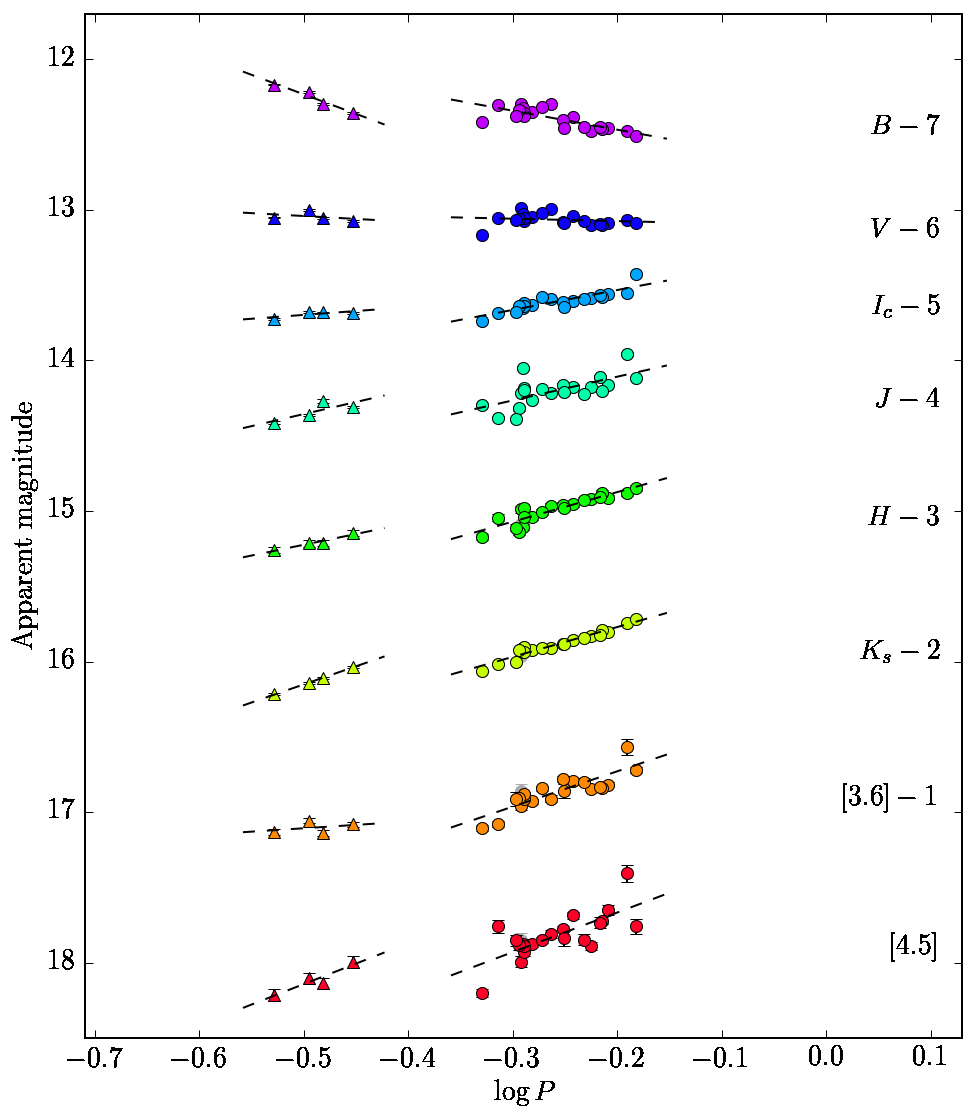

In [29]:
fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(1,1,1)
ax.set_ylim(18.5, 11.7)
ax.set_xlim(-0.71, 0.13)

# separate full and cut sample dataframes into abs and cs
df_ab = df[df.type == 0]
df_c = df[df.type == 1]

df1_ab = df1[df1.type == 0]
df1_c = df1[df1.type == 1]

slope_prior = -2.
zpt_prior = 18
feh = -1.56749344383

per_ab = np.log10(df1_ab.per)
per_c = np.log10(df1_c.per)
xspace_ab = np.linspace(np.min(per_ab) - 0.03, np.max(per_ab) + 0.03, 100)
xspace_c = np.linspace(np.min(per_c) - 0.03, np.max(per_c) + 0.03, 100)

distance_df = {}
distance_df['wavelength'] = wavelength
distance_df['slope_ab'] = []
distance_df['slope_c'] = []
distance_df['slope_err_ab'] = []
distance_df['slope_err_c'] = []
distance_df['zpt_ab'] = []
distance_df['zpt_c'] = []
distance_df['zpt_err_ab'] = []
distance_df['zpt_err_c'] = []

for i in range(8):
    mag_ab = df1_ab['mag_' + band_labels[i]]
    merr_ab = df1_ab['merr_' + band_labels[i]]
    mag_c = df1_c['mag_' + band_labels[i]]
    merr_c = df1_c['merr_' + band_labels[i]]
    
    # do the fitting
    popt_ab, pcov_ab = curve_fit(fitfunc_ab, per_ab, mag_ab, p0 = [slope_prior, zpt_prior])
    popt_c, pcov_c = curve_fit(fitfunc_c, per_c, mag_c, p0 = [slope_prior, zpt_prior])
    slope_ab, slope_err_ab = popt_ab[0], np.sqrt(np.diag(pcov_ab))[0]
    zpt_ab, zpt_err_ab = popt_ab[1], np.sqrt(np.diag(pcov_ab))[1]
    slope_c, slope_err_c = popt_c[0], np.sqrt(np.diag(pcov_c))[0]
    zpt_c, zpt_err_c = popt_c[1], np.sqrt(np.diag(pcov_c))[1]
    
    distance_df['slope_ab'].append(slope_ab)
    distance_df['slope_err_ab'].append(slope_err_ab)
    distance_df['zpt_ab'].append(zpt_ab)
    distance_df['zpt_err_ab'].append(zpt_err_ab)
    distance_df['slope_c'].append(slope_c)
    distance_df['slope_err_c'].append(slope_err_c)
    distance_df['zpt_c'].append(zpt_c)
    distance_df['zpt_err_c'].append(zpt_err_c)
    
    # fit lines for plotting + get residuals
    linfit_ab = fitfunc_ab(xspace_ab, slope_ab, zpt_ab)
    resid_ab = mag_ab - (slope_ab * per_ab + zpt_ab)
    linfit_c = fitfunc_c(xspace_c, slope_c, zpt_c)
    resid_c = mag_c - (slope_c * per_c + zpt_c)
    
    df1_ab['resid_' + band_labels[i]] = resid_ab
    df1_c['resid_' + band_labels[i]] = resid_c

    print band_names[i], 'ab', slope_ab, slope_err_ab, zpt_ab, zpt_err_ab
    print band_names[i], 'c', slope_c, slope_err_c, zpt_c, zpt_err_c
    
    # plot full sample in grey
    plt.errorbar(np.log10(df_ab.per), df_ab['mag_' + band_labels[i]] - mag_offset[i],
                 yerr=df_ab['merr_' + band_labels[i]].values, fmt='o', color='#AAAAAA',
                 mec='#AAAAAA', zorder=-1)
    plt.errorbar(np.log10(df_c.per), df_c['mag_' + band_labels[i]] - mag_offset[i],
                 yerr=df_c['merr_' + band_labels[i]].values, fmt='^', color='#AAAAAA',
                 mec='#AAAAAA', zorder=-1)

    #err_wtf = df_bad_ab['merr_' + band_labels[i]].values
                     
#     plt.errorbar(np.log10(df_bad_ab.per), df_bad_ab['mag_' + band_labels[i]] - mag_offset[i],
#                  yerr=df_bad_ab['merr_' + band_labels[i]].values, fmt='o', color='k',
#                  mfc='w', zorder=10)
#     plt.errorbar(np.log10(df_bad_c.per), df_bad_c['mag_' + band_labels[i]] - mag_offset[i],
#                  yerr=df_bad_c['merr_' + band_labels[i]].values, fmt='^', color='k',
#                  mfc='w', zorder=10)
    

    # plot cut sample in color
    plt.errorbar(per_ab.values, mag_ab.values - mag_offset[i], yerr=merr_ab.values, fmt='o',
                 mfc=plot_colors[i], color='k')
    plt.errorbar(per_c.values, mag_c.values - mag_offset[i], yerr=merr_c.values,
                 fmt='^', mfc=plot_colors[i], color='k')
    
    ppl.plot(xspace_ab, linfit_ab - mag_offset[i], 'k--', lw=1)
    ppl.plot(xspace_c, linfit_c - mag_offset[i], 'k--', lw=1)
    
    # add labels
    if mag_offset[i] == 0:
        plt.text(ax.get_xlim()[1] - 0.02, np.median(mag_ab - mag_offset[i] + 0.1),
                 '${}$'.format(band_names[i]), ha='right')
    else:
        plt.text(ax.get_xlim()[1] - 0.02, np.median(mag_ab - mag_offset[i] + 0.1),
                 '${} - {}$'.format(band_names[i], mag_offset[i]), ha='right')

ax.set_ylabel('Apparent magnitude')
ax.set_xlabel(r'$\log P$')
fig.tight_layout()
fig.savefig('final_plots/reticulum_pl_fits.pdf')

In [30]:
# make table of distances

# weight_ab = len(per_ab)/float(len(df1))
# weight_c = len(per_c)/float(len(df1))

# distance_df['dist_mean'] = np.asarray(distance_df['dist_ab']) * weight_ab + \
#                            np.asarray(distance_df['dist_c']) * weight_c
# distance_df['err_mean'] = np.sqrt((np.asarray(distance_df['err_ab']) * weight_ab)**2 + \
#                           (np.asarray(distance_df['err_c']) * weight_c)**2)
distance_df = pd.DataFrame.from_dict(distance_df)
distance_df = distance_df[['wavelength','slope_ab','slope_err_ab','zpt_ab','zpt_err_ab',
                           'slope_c','slope_err_c','zpt_c','zpt_err_c']]
distance_df.to_csv('final_data_files/reticulum_fit_params.csv', index=False)

In [31]:
# incorporate residuals into full table and save

df1_withresid = pd.concat([df1_ab, df1_c])
df_withresid = df_orig.merge(df1_withresid, how='outer', on=list(set(df.keys()) & set(df1_withresid.keys())))
df_withresid.sort('id', inplace=True)
df_withresid.to_csv('final_data_files/reticulum_withresid_m4_clipped.csv', index=False)

/Users/Meredith/anaconda2/envs/iraf27/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [32]:
df_ab = df_withresid[df_withresid.type==0]
df_c = df_withresid[df_withresid.type==1]

In [41]:
for l in band_labels[3:]:
    print (l, df_ab['resid_{}'.format(l)].std(), df_ab['merr_{}'.format(l)].mean(),
           df_c['resid_{}'.format(l)].std(), df_c['merr_{}'.format(l)].mean())

('j', 0.074858587131950122, 0.0093333333333333358, 0.038437546544986795, 0.0097500000000000017)
('h', 0.037835326762610894, 0.019636363636363643, 0.010468880672872135, 0.02)
('k', 0.021767499835415184, 0.0056818181818181828, 0.002000883506171885, 0.0062500000000000003)
('3', 0.059078475710548979, 0.024318181818181819, 0.036697992989671968, 0.01975)
('4', 0.10396256657106072, 0.032863636363636366, 0.031549799801571556, 0.037250000000000005)
